# Problem 1

In [92]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

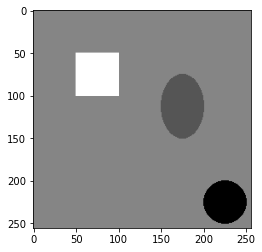

Area of object_1: 2500 pixels
Area of object_2: 1963.4954084936207 pixels
Area of object_3: 2945.243112740431 pixels


In [93]:
# Open original image
original_image = Image.open('heart.jpg')

# Get the size of the original image
width, height = original_image.size

# Create a new image with a gray background
SEG1 = Image.new('L', (width, height), 128)

# Create a draw object
draw = ImageDraw.Draw(SEG1)

# Define the geometric shapes and their gray-levels
shapes = [
    {'shape': 'rectangle', 'coords': [(50, 50), (100, 100)], 'color': 200},
    {'shape': 'circle', 'coords': [(200, 200), (250, 250)], 'color': 50},
    {'shape': 'ellipse', 'coords': [(150, 75), (200, 150)], 'color': 100},
]

# A dictionary to store area of each shape
area_dict = {}

# Draw each shape on the image
for i, shape in enumerate(shapes):
    if shape['shape'] == 'rectangle':
        draw.rectangle(shape['coords'], fill=shape['color'])
        area_dict[f"object_{i+1}"] = abs((shape['coords'][1][0] - shape['coords'][0][0]) * (shape['coords'][1][1] - shape['coords'][0][1]))
    elif shape['shape'] == 'circle':
        draw.ellipse(shape['coords'], fill=shape['color'])
        radius = (shape['coords'][1][0] - shape['coords'][0][0]) / 2
        area_dict[f"object_{i+1}"] = np.pi * radius * radius
    elif shape['shape'] == 'ellipse':
        draw.ellipse(shape['coords'], fill=shape['color'])
        radius_x = (shape['coords'][1][0] - shape['coords'][0][0]) / 2
        radius_y = (shape['coords'][1][1] - shape['coords'][0][1]) / 2
        area_dict[f"object_{i+1}"] = np.pi * radius_x * radius_y

# Save the image
SEG1.save('SEG1.jpg')

# Display the image
plt.imshow(SEG1, cmap='gray')
plt.show()

# Print the area of each object
for object_id, area in area_dict.items():
    print(f'Area of {object_id}: {area} pixels')

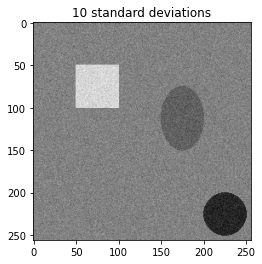

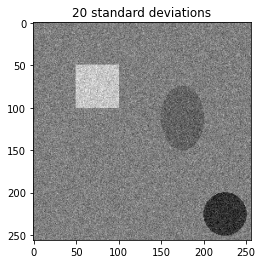

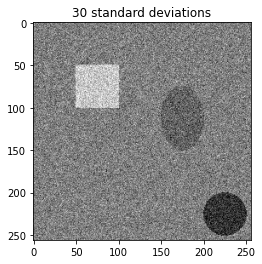

In [94]:
# Additive Gaussian Noise Only
# Define standard deviations for the Gaussian noise
std_devs = [10, 20, 30]

# Convert the image to a numpy array
SEG1_array = np.array(SEG1)

# Create the noisy images
for i, std_dev in enumerate(std_devs):
    # Generate Gaussian noise
    noise = np.random.normal(0, std_dev, SEG1_array.shape)

    # Add the noise to the image
    SEG2 = SEG1_array + noise

    # Ensure the values are within the valid range [0, 255]
    SEG2 = np.clip(SEG2, 0, 255).astype(np.uint8)

    # Convert the array back to an image
    SEG2_image = Image.fromarray(SEG2)

    # Save the image
    SEG2_image.save(f'SEG2_{i+1}.jpg')

    # Display the image
    plt.imshow(SEG2_image, cmap='gray')
    plt.title(f'{std_dev} standard deviations')
    plt.show()


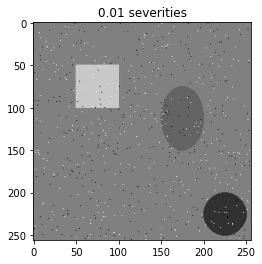

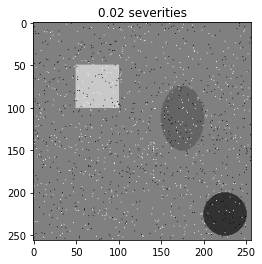

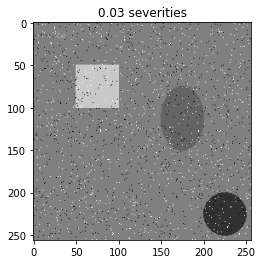

In [95]:
# Based on SEG1 (Random Impulse Noise Only)
# Define severities for the impulse noise
severities = [0.01, 0.02, 0.03]  # Severity is the fraction of total pixels

# Create the noisy images
for i, severity in enumerate(severities):
    # Open the corresponding SEG2 image
    SEG1_image = Image.open(f'SEG1.jpg')
    SEG1_array = np.array(SEG1_image)
    
    # Create a copy for manipulation
    SEG3 = SEG1_array.copy()

    # Calculate the number of pixels to alter
    num_pixels = int(severity * SEG3.size)

    # Generate random positions for the impulse noise
    positions = np.random.choice(SEG3.size, num_pixels, replace=False)

    # Add impulse noise (salt-and-pepper noise)
    SEG3.flat[positions[:num_pixels // 2]] = 0  # Minimum value
    SEG3.flat[positions[num_pixels // 2:]] = 255  # Maximum value

    # Convert the array back to an image
    SEG3_image = Image.fromarray(SEG3)

    # Save the image
    SEG3_image.save(f'SEG3_1_{i+1}.jpg')

    # Display the image
    plt.imshow(SEG3_image, cmap='gray')
    plt.title(f'{severity} severities')
    plt.show()

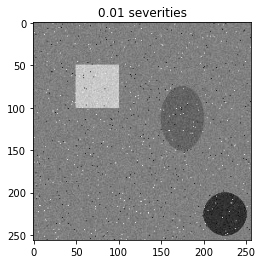

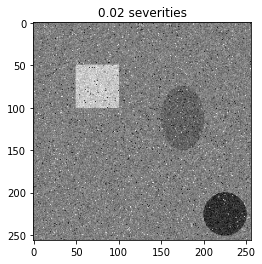

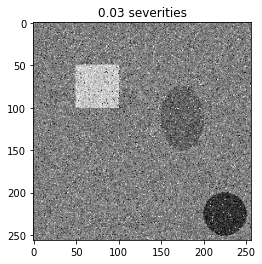

In [96]:
# Based on SEG2 (Random Impulsive Noise based on Additive Gaussian Noise)
# Define severities for the impulse noise
severities = [0.01, 0.02, 0.03]  # Severity is the fraction of total pixels

# Create the noisy images
for i, severity in enumerate(severities):
    # Open the corresponding SEG2 image
    SEG2_image = Image.open(f'SEG2_{i+1}.jpg')
    SEG2_array = np.array(SEG2_image)
    
    # Create a copy for manipulation
    SEG3 = SEG2_array.copy()

    # Calculate the number of pixels to alter
    num_pixels = int(severity * SEG3.size)

    # Generate random positions for the impulse noise
    positions = np.random.choice(SEG3.size, num_pixels, replace=False)

    # Add impulse noise (salt-and-pepper noise)
    SEG3.flat[positions[:num_pixels // 2]] = 0  # Minimum value
    SEG3.flat[positions[num_pixels // 2:]] = 255  # Maximum value

    # Convert the array back to an image
    SEG3_image = Image.fromarray(SEG3)

    # Save the image
    SEG3_image.save(f'SEG3_2_{i+1}.jpg')

    # Display the image
    plt.imshow(SEG3_image, cmap='gray')
    plt.title(f'{severity} severities')
    plt.show()

# Problem 2

In [116]:
def relative_signed_area_error(true_areas, measured_areas):
    sum_true_areas = sum(true_areas)
    sum_measured_areas = sum(measured_areas)
    
    if sum_true_areas == 0:
        raise ValueError("Sum of true areas cannot be zero")
    
    # relative signed area error
    relative_error = (sum_true_areas - sum_measured_areas) * 100 / sum_true_areas
    
    return relative_error

def labelling_error(incorrectly_labeled_pixels, true_areas):
    sum_true_areas = sum(true_areas)
    
    if sum_true_areas == 0:
        raise ValueError("Sum of true areas cannot be zero")
    
    l_error = incorrectly_labeled_pixels * 100 / sum_true_areas
    
    return l_error

# test of relative_signed_area_error()
true_areas = [150, 200, 250]    # Areas of objects in the original image
measured_areas = [160, 190, 240]  # Areas of objects after segmentation

relative_error = relative_signed_area_error(true_areas, measured_areas)

print(f'Relative signed area error: {relative_error} %')

# test of labelling_error()
incorrectly_labeled_pixels = 300  # Number of incorrectly labeled pixels
true_areas = [150, 200, 250]    # Areas of objects in the original image

l_error = labelling_error(incorrectly_labeled_pixels, true_areas)

print(f'Labelling error: {l_error} %')

Relative signed area error: 1.6666666666666667 %
Labelling error: 50.0 %


# Problem 3

In [117]:
def compare_segmentation_images(true_image, segmented_image):
    true_array = np.array(true_image)
    segmented_array = np.array(segmented_image)

    true_positive = (true_array > 128) & (segmented_array > 128)
    true_negative = (true_array <= 128) & (segmented_array <= 128)
    false_positive = (true_array <= 128) & (segmented_array > 128)
    false_negative = (true_array > 128) & (segmented_array <= 128)

    correctly_labeled_pixels = np.sum(true_positive) + np.sum(true_negative)
    incorrectly_labeled_pixels = np.sum(false_positive) + np.sum(false_negative)

    true_areas = [np.sum(true_positive)]
    measured_areas = [np.sum(segmented_array > 128)]

    return true_areas, measured_areas, incorrectly_labeled_pixels

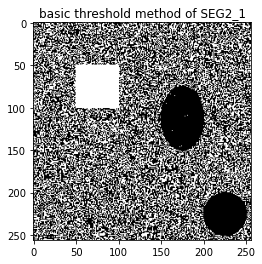

Relative signed area error for SEG2_thresholded_1: -1018.5697808535178%
Labelling error for SEG2_thresholded_1: 1018.5697808535178%


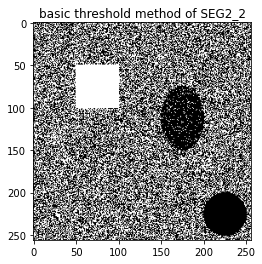

Relative signed area error for SEG2_thresholded_2: -1077.8162245290273%
Labelling error for SEG2_thresholded_2: 1077.8162245290273%


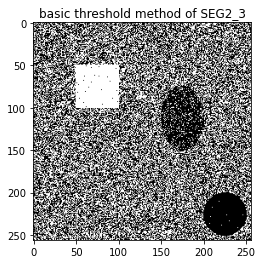

Relative signed area error for SEG2_thresholded_3: -1103.416149068323%
Labelling error for SEG2_thresholded_3: 1104.386645962733%


In [118]:
def threshold_image(image, threshold=128):
    return image.point(lambda p: p > threshold and 255)

# Apply the threshold and comparason function to the SEG2 images
for i in range(3):
    # Open the corresponding SEG2 image
    SEG2_image = Image.open(f'SEG2_{i+1}.jpg')

    # Apply the threshold
    thresholded_image = threshold_image(SEG2_image)

    # Save the image
    thresholded_image.save(f'SEG2_thresholded_{i+1}.jpg')
    
    # Display the image
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'basic threshold method of SEG2_{i+1}')
    plt.show()
    
    # Calculate the true_areas, measured_areas, and incorrectly_labeled_pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1, thresholded_image)

    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG2_thresholded_{i+1}: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG2_thresholded_{i+1}: {l_error}%")

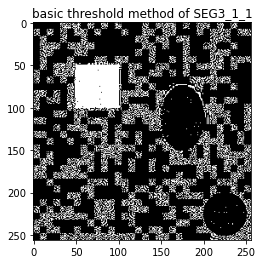

Relative signed area error for SEG3_1_thresholded_1: -519.3361636433809%
Labelling error for SEG3_1_thresholded_1: 519.7221150135083%


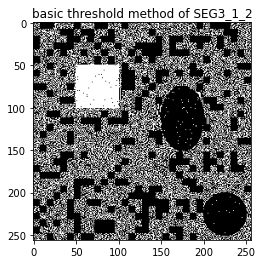

Relative signed area error for SEG3_1_thresholded_2: -779.7118380062306%
Labelling error for SEG3_1_thresholded_2: 780.9968847352025%


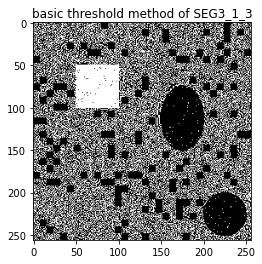

Relative signed area error for SEG3_1_thresholded_3: -935.5355746677092%
Labelling error for SEG3_1_thresholded_3: 937.21657544957%


In [119]:
# Apply the threshold to the SEG3_1 images (Random Impulse Noise Only)
for i in range(3):
    # Open the corresponding SEG2 image
    SEG3_image = Image.open(f'SEG3_1_{i+1}.jpg')

    # Apply the threshold
    thresholded_image = threshold_image(SEG3_image)

    # Save the image
    thresholded_image.save(f'SEG3_1_thresholded_{i+1}.jpg')

    # Display the image
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'basic threshold method of SEG3_1_{i+1}')
    plt.show()
    
    # Calculate the true_areas, measured_areas, and incorrectly_labeled_pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1, thresholded_image)

    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG3_1_thresholded_{i+1}: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG3_1_thresholded_{i+1}: {l_error}%")

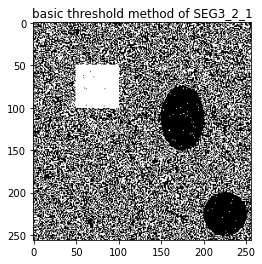

Relative signed area error for SEG3_2_thresholded_1: -1037.0756172839506%
Labelling error for SEG3_2_thresholded_1: 1037.4228395061727%


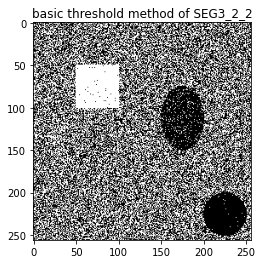

Relative signed area error for SEG3_2_thresholded_2: -1096.6121495327102%
Labelling error for SEG3_2_thresholded_2: 1097.8971962616822%


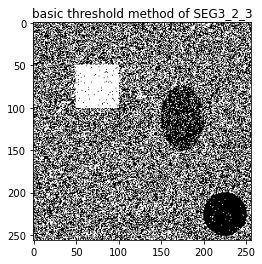

Relative signed area error for SEG3_2_thresholded_3: -1133.4256329113923%
Labelling error for SEG3_2_thresholded_3: 1136.3132911392406%


In [120]:
# Apply the threshold to the SEG3_2 images (Random Impulsive Noise based on Additive Gaussian Noise)
for i in range(3):
    # Open the corresponding SEG2 image
    SEG3_image = Image.open(f'SEG3_2_{i+1}.jpg')

    # Apply the threshold
    thresholded_image = threshold_image(SEG3_image)

    # Save the image
    thresholded_image.save(f'SEG3_2_thresholded_{i+1}.jpg')

    # Display the image
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'basic threshold method of SEG3_2_{i+1}')
    plt.show()
    
    # Calculate the true_areas, measured_areas, and incorrectly_labeled_pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1, thresholded_image)

    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG3_2_thresholded_{i+1}: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG3_2_thresholded_{i+1}: {l_error}%")

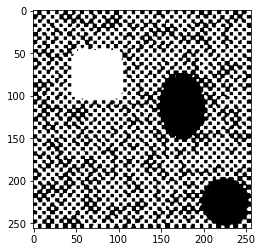

Relative signed area error for SEG2_chanvese_1.jpg: -1079.187646861363%
Labelling error for SEG2_chanvese_1.jpg: 1095.7703927492448%


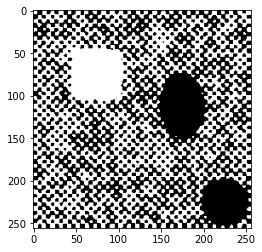

Relative signed area error for SEG2_chanvese_2.jpg: -1027.693346842283%
Labelling error for SEG2_chanvese_2.jpg: 1044.984802431611%


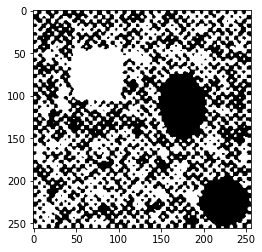

Relative signed area error for SEG2_chanvese_3.jpg: -1029.0643662906436%
Labelling error for SEG2_chanvese_3.jpg: 1044.293297942933%


In [121]:
# Open the original image
SEG1_image = Image.open('SEG1.jpg')
SEG1_array = np.array(SEG1_image)

# Apply the Chan-Vese method and calculate the errors
for i in range(3):
    # Open the corresponding SEG2 image
    SEG2_image = io.imread(f'SEG2_{i+1}.jpg', as_gray=True)

    # Normalize the image to 0-1
    SEG2_image = SEG2_image / 255.0

    # Apply the Chan-Vese segmentation
    cv = segmentation.chan_vese(SEG2_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                                 dt=0.5, init_level_set="checkerboard", extended_output=True)

    # The result of the Chan-Vese segmentation is a binary image. Convert it to an 8-bit image.
    binary_image = img_as_ubyte(cv[0])

    # Calculate the true and measured areas and the number of incorrectly labeled pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1_image, binary_image)

    # Save the image
    io.imsave(f'SEG2_chanvese_{i+1}.jpg', binary_image)

    # Display the image
    plt.imshow(binary_image, cmap='gray')
    plt.show()
    
    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG2_chanvese_{i+1}.jpg: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG2_chanvese_{i+1}.jpg: {l_error}%")

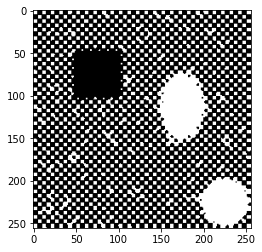

Relative signed area error for SEG3_1_chanvese_1.jpg: -5641.176470588235%
Labelling error for SEG3_1_chanvese_1.jpg: 6326.923076923077%


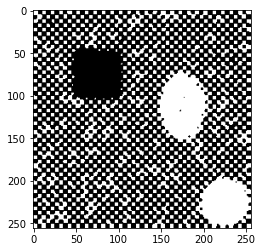

Relative signed area error for SEG3_1_chanvese_2.jpg: -5915.929203539823%
Labelling error for SEG3_1_chanvese_2.jpg: 6584.29203539823%


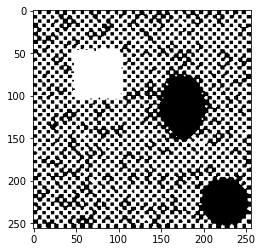

Relative signed area error for SEG3_1_chanvese_3.jpg: -1133.3555038244097%
Labelling error for SEG3_1_chanvese_3.jpg: 1148.8526770867975%


In [122]:
# Open the original image
SEG1_image = Image.open('SEG1.jpg')
SEG1_array = np.array(SEG1_image)

# Apply the Chan-Vese method and calculate the errors
for i in range(3):
    # Open the corresponding SEG3 image
    SEG3_image = io.imread(f'SEG3_1_{i+1}.jpg', as_gray=True)

    # Normalize the image to 0-1
    SEG3_image = SEG3_image / 255.0

    # Apply the Chan-Vese segmentation
    cv = segmentation.chan_vese(SEG3_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                                 dt=0.5, init_level_set="checkerboard", extended_output=True)

    # The result of the Chan-Vese segmentation is a binary image. Convert it to an 8-bit image.
    binary_image = img_as_ubyte(cv[0])

    # Calculate the true and measured areas and the number of incorrectly labeled pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1_image, binary_image)

    # Save the image
    io.imsave(f'SEG3_1_chanvese_{i+1}.jpg', binary_image)

    # Display the image
    plt.imshow(binary_image, cmap='gray')
    plt.show()
    
    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG3_1_chanvese_{i+1}.jpg: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG3_1_chanvese_{i+1}.jpg: {l_error}%")

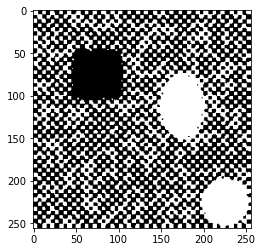

Relative signed area error for SEG3_2_chanvese_1.jpg: -6529.828326180257%
Labelling error for SEG3_2_chanvese_1.jpg: 7175.107296137339%


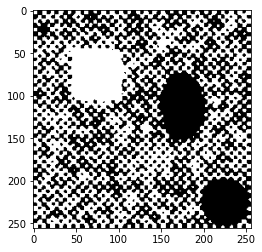

Relative signed area error for SEG3_2_chanvese_2.jpg: -1029.767127910901%
Labelling error for SEG3_2_chanvese_2.jpg: 1046.9794127573405%


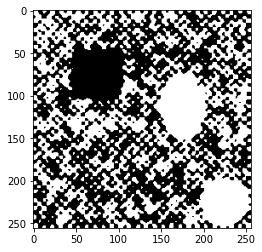

Relative signed area error for SEG3_2_chanvese_3.jpg: -6725.481798715204%
Labelling error for SEG3_2_chanvese_3.jpg: 7369.164882226981%


In [123]:
# Open the original image
SEG1_image = Image.open('SEG1.jpg')
SEG1_array = np.array(SEG1_image)

# Apply the Chan-Vese method and calculate the errors
for i in range(3):
    # Open the corresponding SEG3 image
    SEG3_image = io.imread(f'SEG3_2_{i+1}.jpg', as_gray=True)

    # Normalize the image to 0-1
    SEG3_image = SEG3_image / 255.0

    # Apply the Chan-Vese segmentation
    cv = segmentation.chan_vese(SEG3_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                                 dt=0.5, init_level_set="checkerboard", extended_output=True)

    # The result of the Chan-Vese segmentation is a binary image. Convert it to an 8-bit image.
    binary_image = img_as_ubyte(cv[0])

    # Calculate the true and measured areas and the number of incorrectly labeled pixels
    true_areas, measured_areas, incorrectly_labeled_pixels = compare_segmentation_images(SEG1_image, binary_image)

    # Save the image
    io.imsave(f'SEG3_2_chanvese_{i+1}.jpg', binary_image)

    # Display the image
    plt.imshow(binary_image, cmap='gray')
    plt.show()
    
    # Calculate the relative signed area error
    relative_error = relative_signed_area_error(true_areas, measured_areas)
    print(f"Relative signed area error for SEG3_2_chanvese_{i+1}.jpg: {relative_error}%")

    # Calculate the labelling error
    l_error = labelling_error(incorrectly_labeled_pixels, true_areas)
    print(f"Labelling error for SEG3_2_chanvese_{i+1}.jpg: {l_error}%")

### Result

Between Basic thresholding and Chan-vese:

Comparison of SEG2, SEG3_1 (Additive Gaussian Noise Only), and SEG3_2 (Random Impulsive Noise based on Additive Gaussian Noise), sometimes Chan-vese has more accuracy in both Relative signed area error and Labelling error, it's not as stable as Basic threshold, huge error comes several times (color of artificial object blocks sometimes appear to be inverted).